In [1]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(0)
%matplotlib inline

In [2]:
def data_generation1(n=100):
    return np.concatenate([np.random.randn(n, 1) * 2, np.random.randn(n, 1)], axis=1)

def data_generation2(n=100):
    return np.concatenate([np.random.randn(n, 1) * 2, 2 * np.round(
        np.random.rand(n, 1)) - 1 + np.random.randn(n, 1) / 3.], axis=1)

In [3]:
def get_nnmat(x):
    n = x.shape[0]
    w = np.zeros((n, n))
    diff = x[np.newaxis, :] - x[:, np.newaxis]
    for i in range(n):
        w[i] = np.exp(-np.linalg.norm(diff[i], ord=2, axis=1) ** 2)
    return w

In [4]:
def lpp(x, n_components=1):
    W = get_nnmat(x)
    D = np.diag(W.sum(axis=1))
    L = D - W
    w, v =  scipy.linalg.eig(x.T.dot(L).dot(x), x.T.dot(D).dot(x))
    
    #sorting
    ind = np.argsort(w)
    w = w[ind]
    v = v[ind]
    
    return w[:n_components], v[:n_components, :]

In [5]:
def f(x):
    global v
    return (v[0][1] / v[0][0]) * x

def visualize(x, v):
    plt.xlim(-6., 6.)
    plt.ylim(-6., 6.)
    plt.plot(x[:, 0], x[:, 1], 'rx')
    plt.plot(np.array([-6, 6]), f(np.array([-6, 6])), color = "black")

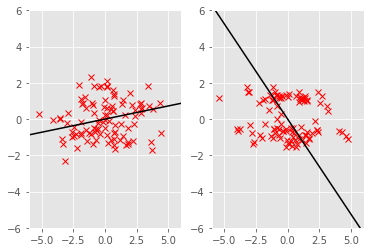

In [6]:
n = 100
n_components = 1

plt.subplot(1,2,1)
x = data_generation1(n)
x = x - np.mean(x, axis=0)
w, v = lpp(x, n_components)
visualize(x, v)

plt.subplot(1,2,2)
x = data_generation2(n)
x = x - np.mean(x, axis=0)
w, v = lpp(x, n_components)
visualize(x, v)